# Lead Score - Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. <br>

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. <br>

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. <br>

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [143]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [85]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Understanding Data

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [87]:
df.shape

(9240, 37)

In [88]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

### Handling Missing Values

In [89]:
# Missing values in each column
# df.isnull().sum().sort_values(ascending=False)
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**No missing values**

In [90]:
# Removing all the columns that have more than 30% null values
df = df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [91]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [92]:
# Dropping columns which have only one unique value
df.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [93]:
# Dropping columns which have only 1 unique value
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [94]:
df1.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

### Analysing Columns with binary values

In [95]:
df1['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

In [96]:
df1['Do Not Call'].value_counts(dropna=False)   #Drop

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [97]:
df1['Search'].value_counts(dropna=False)    # Drop

Search
No     9226
Yes      14
Name: count, dtype: int64

In [98]:
df1['Newspaper Article'].value_counts(dropna=False) # Drop

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [99]:
df1['X Education Forums'].value_counts(dropna=False) # Drop

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [100]:
df1['Newspaper'].value_counts(dropna=False) # Drop

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [101]:
df1['Digital Advertisement'].value_counts(dropna=False) # Drop

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [102]:
df1['Through Recommendations'].value_counts(dropna=False) # Drop

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [103]:
df1['A free copy of Mastering The Interview'].value_counts(dropna=False) 

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

Practically all of the values of variables are `Do Not Call`, `Search`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations` are **No**, it's best that we drop these columns as they won't help with our analysis.

In [104]:
df1= df1.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'],axis=1)

In [105]:
df1.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Country Column

In [106]:
df1["Country"].value_counts(dropna = False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberi

**Most of the leads are from India**

In [107]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**More than 26% of the data has NULL Values, let us impute the NULL values with mode i.e India**

In [108]:
# Replacing missing data with 'India'
df1['Country'] = df1['Country'].replace(np.nan, 'India')

In [109]:
df1['Country'] = df1['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')

In [110]:
df1['Country'].value_counts()

Country
India            8953
Outside India     287
Name: count, dtype: int64

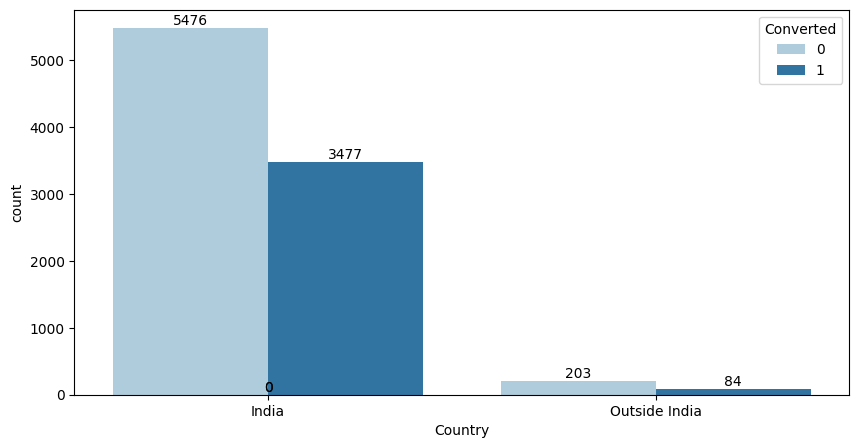

In [111]:
# Visualising 'country' column after data imputation

plt.figure(figsize=(10,5))
plt1=sns.countplot(x='Country', hue='Converted', data=df1, palette = 'Paired')

# Add values on the bars
for p in plt1.patches:
    plt1.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  fontsize=10, color='black', 
                  xytext=(0, 5), 
                  textcoords='offset points')


plt1.set_xticklabels(plt1.get_xticklabels())
plt.show()

In [112]:
df1.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Specialization Column

In [113]:
# Checking value counts of "Specialization" column
df1['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

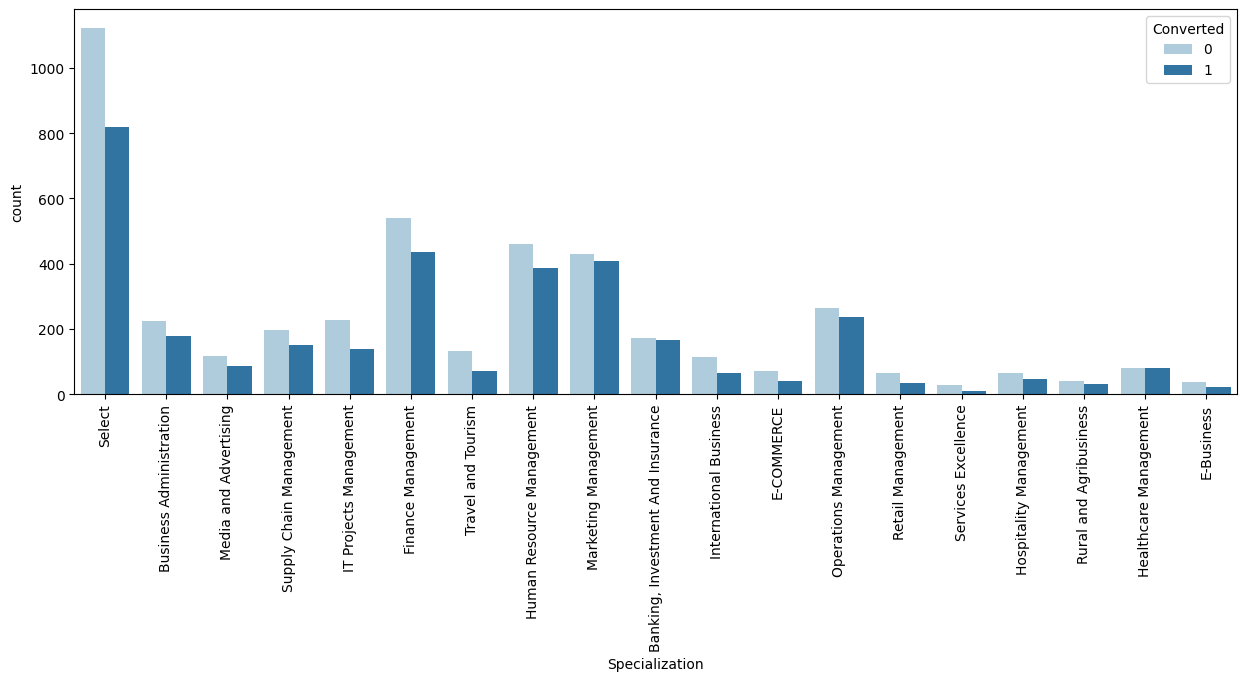

In [114]:
plt.figure(figsize=(15,5))
plt3=sns.countplot(x='Specialization', hue='Converted', data=df1, palette = 'Paired')
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

Some of the the users have not mentioned their specializations so might be students or their specialization was not in list.

Hence we will replace NaN and 'Select' values with 'Others'

In [115]:
# Replacing 'Specialization' column missing data with 'Others'

df1['Specialization'] = df1['Specialization'].replace([np.nan, 'Select'], 'Others')

In [116]:
df1['Specialization'].value_counts()

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

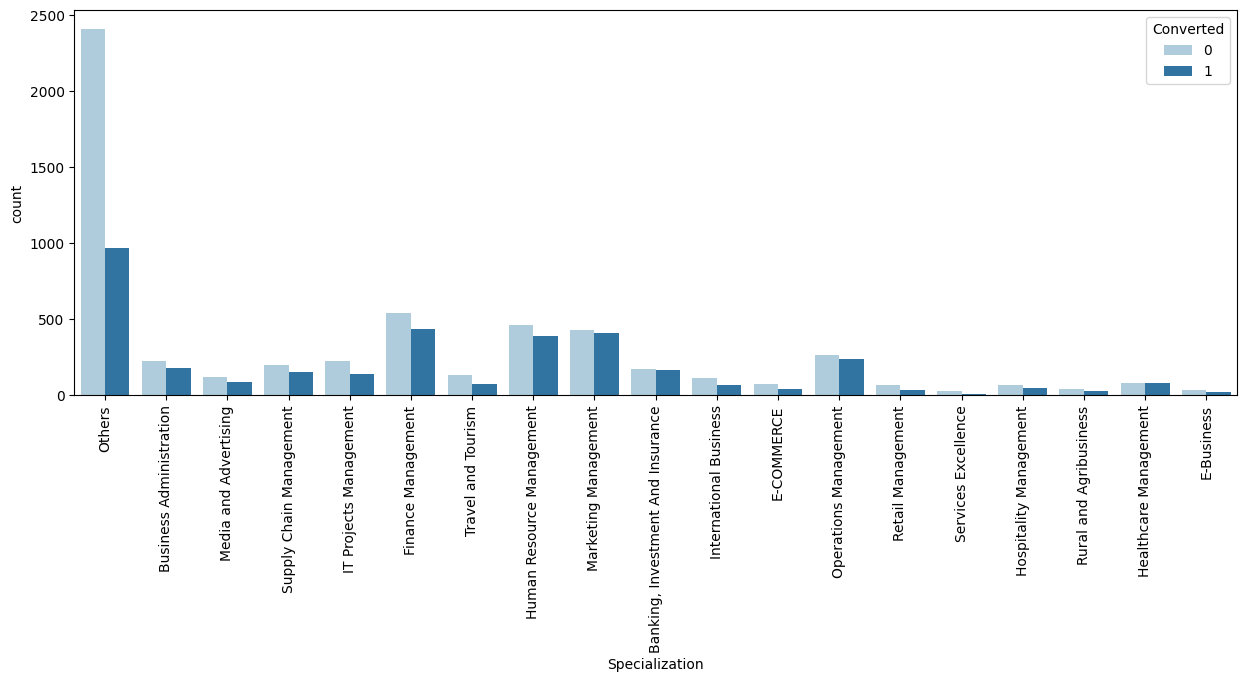

In [117]:
plt.figure(figsize=(15,5))
plt3=sns.countplot(x='Specialization', hue='Converted', data=df1, palette = 'Paired')
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

**Leads with different types of 'Management' specializations are more common and have a higher chance of conversion. So, we group all these 'Management' specializations under a single term, 'Management'**

In [119]:
#combining different management branches under one specialization

df1['Specialization'] = df1['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management') 

In [120]:
df1['Specialization'].value_counts()

Specialization
Management                           4253
Others                               3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

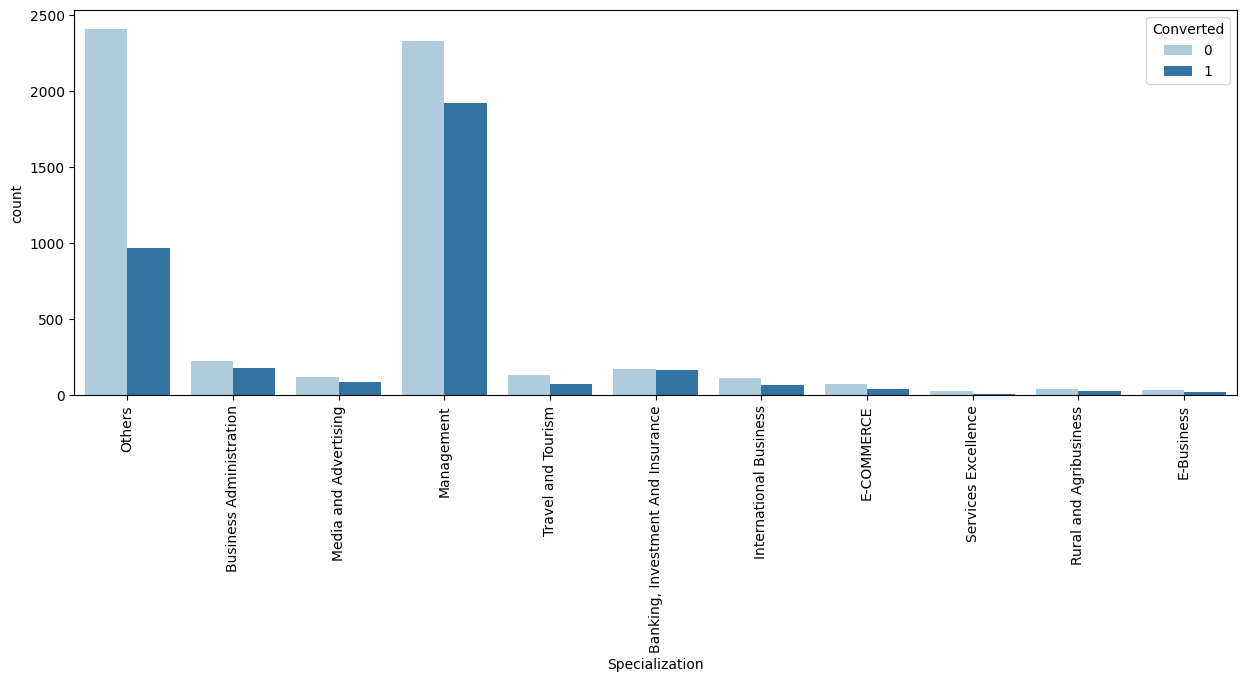

In [122]:
# Visualising the spread of data in 'specialization' column after data correction

plt.figure(figsize=(15,5))
plt3=sns.countplot(x='Specialization', hue='Converted', data=df1, palette = 'Paired')
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

### 'What is your current occupation' column

In [123]:
df1['What is your current occupation'].value_counts(dropna = False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [124]:
# Replacing 'What is your current occupation' column missing data with most common datapoint i.e. 'Unemployed'

df1['What is your current occupation'] = df1['What is your current occupation'].replace(np.nan, 'Unemployed')

In [125]:
df1['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

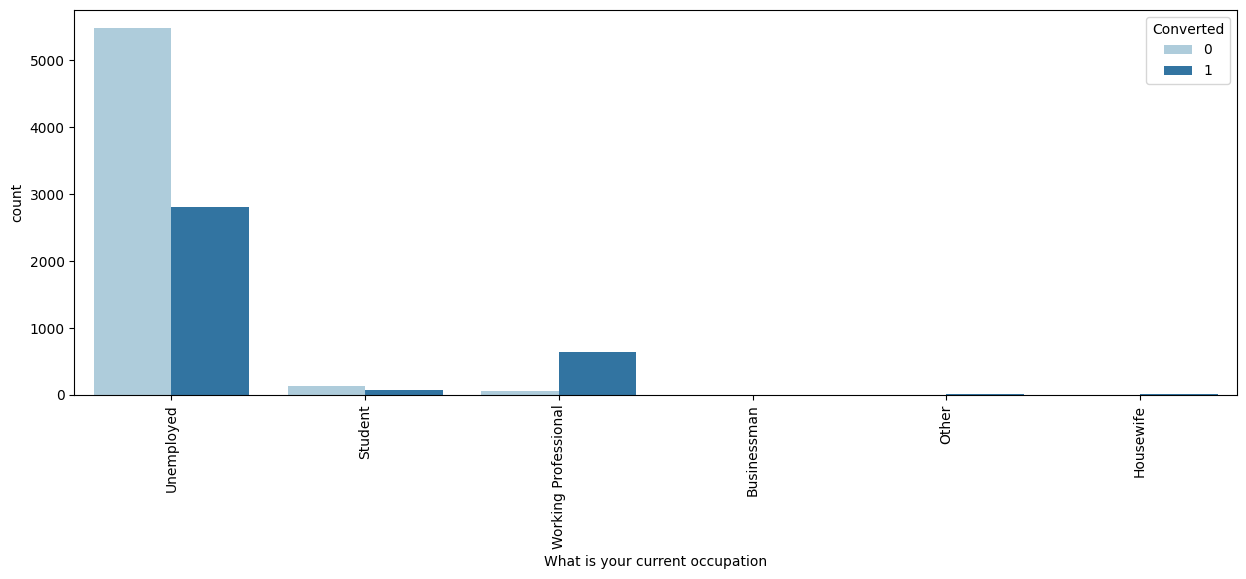

In [126]:
# Visualising the spread of data in 'What is your current occupation' column

plt.figure(figsize=(15,5))
plt4=sns.countplot(x='What is your current occupation', hue='Converted', data=df1, palette = 'Paired')
plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
plt.show()

**Most of the leads are unemployed, but an interesting trend shows that 'working professionals' are more likely to convert.**

### 'What matters most to you in choosing a course' Column

In [127]:
# Checking value counts

df1['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

**Better Career Prospects appears 6528 times while the other two categories appear once twice and once respectively. So we should drop this column as well.**

In [128]:
df2 = df1.drop('What matters most to you in choosing a course',axis=1)

In [129]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum().sort_values(ascending=False)/len(df2.index)), 2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Origin                               0.00
Prospect ID                               0.00
Converted                                 0.00
Do Not Email                              0.00
Total Time Spent on Website               0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

**Since the number of null values in the columns is now quite small, we can simply remove the rows containing these null values.**

In [130]:
# Drop the null value rows in the column 'TotalVisits'

df2 = df2[~pd.isnull(df2['TotalVisits'])]

In [131]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum().sort_values(ascending=False)/len(df2.index)), 2)

Lead Source                               0.32
Prospect ID                               0.00
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [133]:
# Drop the null value rows in the column 'TotalVisits'

df2 = df2[~pd.isnull(df2['Lead Source'])]

**The variables `Prospect ID` is clearly not useful for the analysis, so it's best to drop them.**

In [134]:
# Removing Id values since they are unique for everyone
df_final = df2.drop(['Prospect ID'], axis=1)

In [135]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,Modified


In [136]:
df_final.shape

(9074, 13)

## Dummy Variable Creation

In [137]:
# Check the columns which are of type 'object'

temp = df_final.select_dtypes(include=['object'])
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [147]:
# Creating dummy variables for the object type features
dummy = pd.get_dummies(df_final[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                        'Country', 'Specialization', 'What is your current occupation',
                        'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
leads_final = pd.concat([df_final, dummy], axis=1)

In [148]:
leads_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtube

In [149]:
# Drop the variables for which the dummy variables have been created

leads_final = leads_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                        'Country', 'Specialization', 'What is your current occupation',
                        'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [150]:
leads_final.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
    

In [151]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Splitting the dataset

In [152]:
# Putting all the feature variables in X

X = leads_final.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [153]:
# Putting the target variable in y

y = leads_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [171]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
# Scaling the three numeric features - 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'


scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 
                                            'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building

### Feature elimination using RFE

In [174]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [175]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [176]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.False_, np.int64(3)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(6)),
 ('Lead Origin_Landing Page Submission', np.True_, np.int64(1)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(8)),
 ('Lead Source_Direct Traffic', np.False_, np.int64(24)),
 ('Lead Source_Facebook', np.False_, np.int64(59)),
 ('Lead Source_Google', np.False_, np.int64(28)),
 ('Lead Source_Live Chat', np.False_, np.int64(42)),
 ('Lead Source_NC_EDM', np.False_, np.int64(16)),
 ('Lead Source_Olark Chat', np.False_, np.int64(4)),
 ('Lead Source_Organic Search', np.False_, np.int64(27)),
 ('Lead Source_Pay per Click Ads', np.False_, np.int64(44)),
 ('Lead Source_Press_Release', np.False_, np.int64(52)),
 ('Lead Source_Reference', np.False_, np.int64(7)),
 ('Lead Source_Referral Sites', np.False_, np.int64(26)),
 ('Lead Source_Social Media', np.False_, np.int64(14)),
 ('Lead Source_WeL

In [177]:
col = X_train.columns[rfe.support_]

### Checking p-values and VIF

In [178]:
X_train = X_train[col]

In [179]:
import statsmodels.api as sm

In [180]:
# Checking p-value

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.1
Date:                Sun, 17 Nov 2024   Deviance:                       5306.2
Time:                        22:55:56   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7791      0.131      5.963      0.000       0.523       1.035
Total Time Spent on Website                              4.0308      0.150     26.806      0.000       3.736       4.326
Lead Origin_Landing Page Submission                     -1.4226      0.120    -11.856      0.000      -1.658      -1.187
Lead Origin_Lead Add Form                                2.9073      0.228     12.767      0.000       2.461       3.354
Lead Source_Welingak Website                             2.6676      0.761      3.505      0.000       1.176       4.159
Do Not Email_Yes                                        -1.5382      0.202     -7.619      0.000      -1.934      -1.142
Last Activity_Email Bounced                             -1.1072      0.436     -2.541      0.011      -1.961      -0.253
Last Activity_Had a Phone Conversation                   1.7958      0.796      2.255      0.024       0.235       3.356
Specialization_Others                                   -1.1196      0.122     -9.148      0.000      -1.360      -0.880
What is your current occupation_Housewife               22.6255   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Working Professional     2.5817      0.193     13.384      0.000       2.204       2.960
Last Notable Activity_Email Link Clicked                -1.7801      0.258     -6.889      0.000      -2.287      -1.274
Last Notable Activity_Email Opened                      -1.4301      0.088    -16.230      0.000      -1.603      -1.257
Last Notable Activity_Modified                          -2.0975      0.093    -22.628      0.000      -2.279      -1.916
Last Notable Activity_Olark Chat Conversation           -2.4865      0.325     -7.648      0.000      -3.124      -1.849
Last Notable Activity_Page Visited on Website           -1.7504      0.199     -8.795      0.000      -2.140      -1.360
========================================================================================================================
"""

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.86
12,Last Notable Activity_Modified,2.09
7,Specialization_Others,2.04
0,Total Time Spent on Website,1.87
11,Last Notable Activity_Email Opened,1.84
4,Do Not Email_Yes,1.84
5,Last Activity_Email Bounced,1.73
2,Lead Origin_Lead Add Form,1.49
3,Lead Source_Welingak Website,1.37
9,What is your current occupation_Working Profes...,1.18


**VIF is under 5 for all of the features**

**Dropping `What is your current occupation_Housewife`, since it has a high p-value**

In [183]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [184]:
# Checking p-value

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.2
Date:                Sun, 17 Nov 2024   Deviance:                       5314.4
Time:                        22:56:27   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7804      0.131      5.975      0.000       0.524       1.036
Total Time Spent on Website                              4.0290      0.150     26.820      0.000       3.735       4.323
Lead Origin_Landing Page Submission                     -1.4222      0.120    -11.863      0.000      -1.657      -1.187
Lead Origin_Lead Add Form                                2.9227      0.227     12.849      0.000       2.477       3.369
Lead Source_Welingak Website                             2.6529      0.761      3.486      0.000       1.161       4.145
Do Not Email_Yes                                        -1.5392      0.202     -7.623      0.000      -1.935      -1.143
Last Activity_Email Bounced                             -1.1061      0.436     -2.539      0.011      -1.960      -0.252
Last Activity_Had a Phone Conversation                   1.7958      0.796      2.255      0.024       0.235       3.357
Specialization_Others                                   -1.1239      0.122     -9.188      0.000      -1.364      -0.884
What is your current occupation_Working Professional     2.5774      0.193     13.360      0.000       2.199       2.956
Last Notable Activity_Email Link Clicked                -1.7723      0.257     -6.888      0.000      -2.277      -1.268
Last Notable Activity_Email Opened                      -1.4233      0.088    -16.168      0.000      -1.596      -1.251
Last Notable Activity_Modified                          -2.0965      0.093    -22.620      0.000      -2.278      -1.915
Last Notable Activity_Olark Chat Conversation           -2.4842      0.325     -7.640      0.000      -3.122      -1.847
Last Notable Activity_Page Visited on Website           -1.7500      0.199     -8.794      0.000      -2.140      -1.360
========================================================================================================================
"""

In [185]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.86
11,Last Notable Activity_Modified,2.08
7,Specialization_Others,2.04
0,Total Time Spent on Website,1.87
4,Do Not Email_Yes,1.84
10,Last Notable Activity_Email Opened,1.83
5,Last Activity_Email Bounced,1.73
2,Lead Origin_Lead Add Form,1.48
3,Lead Source_Welingak Website,1.37
8,What is your current occupation_Working Profes...,1.18


**No feature has a p-value greater than 0.05 and VIF greater than 0.5**

## Model Evaluation

In [186]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.206434
1012    0.183975
9226    0.080180
4750    0.864828
7987    0.532143
1281    0.757538
2880    0.113259
4971    0.971673
7536    0.819803
1248    0.492821
dtype: float64

In [187]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20643398, 0.18397503, 0.08018   , 0.86482772, 0.53214269,
       0.75753821, 0.11325892, 0.97167311, 0.81980333, 0.4928206 ])

In [188]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.206434
1,0,0.183975
2,0,0.080180
3,1,0.864828
4,1,0.532143


In [189]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.206434,0
1,0,0.183975,0
2,0,0.080180,0
3,1,0.864828,1
4,1,0.532143,1


In [190]:
from sklearn import metrics

In [191]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3475  430]
 [ 818 1628]]


In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [192]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8034955125177138


In [193]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Calculate the sensitivity

print(round(TP/(TP+FN), 2)*100)

67.0


In [198]:
# Calculate the specificity

print(round(TN/(TN+FP), 2)*100)

89.0


## ROC Curve

In [202]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [203]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False)

In [204]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

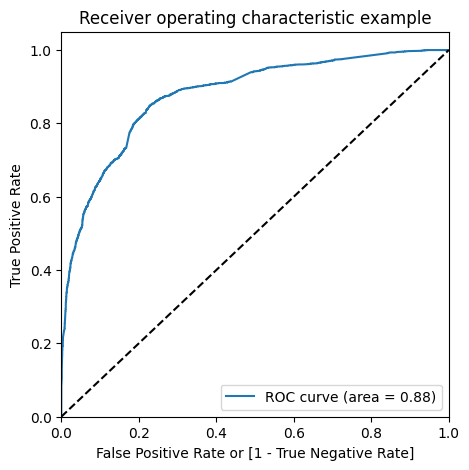

In [205]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**The area under the ROC curve is 0.88, indicating a good model. Next, let's examine the sensitivity and specificity trade-off to determine the optimal cutoff point.**

In [206]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.206434,0,1,1,1,0,0,0,0,0,0,0
1,0,0.183975,0,1,1,0,0,0,0,0,0,0,0
2,0,0.080180,0,1,0,0,0,0,0,0,0,0,0
3,1,0.864828,1,1,1,1,1,1,1,1,1,1,0
4,1,0.532143,1,1,1,1,1,1,1,0,0,0,0


In [207]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.585420  0.963614  0.348528
0.2   0.2  0.764447  0.894930  0.682714
0.3   0.3  0.799244  0.854047  0.764917
0.4   0.4  0.805542  0.786999  0.817157
0.5   0.5  0.803496  0.665576  0.889885
0.6   0.6  0.797512  0.590352  0.927273
0.7   0.7  0.780979  0.515127  0.947503
0.8   0.8  0.762715  0.426002  0.973624
0.9   0.9  0.720989  0.293540  0.988732


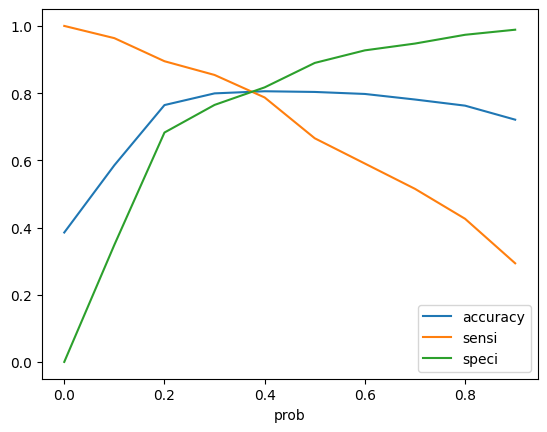

In [208]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**We observe that around 0.39, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.**

In [209]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.206434,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.183975,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.080180,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.864828,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.532143,1,1,1,1,1,1,1,0,0,0,0,1


In [210]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8072744449692961

In [214]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[3175  730]
 [ 494 1952]]


In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [218]:
# Calculate Sensitivity

print(round(TP/(TP+FN), 2)*100)

80.0


In [219]:
# Calculate the specificity

print(round(TN/(TN+FP), 2)*100)

81.0


## Making predictions on Test Dataset

In [222]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Em

In [ ]:
# Scaling the test set using just 'transform' on it

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [224]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0.070530,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1490,0.679695,1,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0.033243,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4216,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,0.073675,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [226]:
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0.070530,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1490,1.0,0.679695,1,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,1.0,0.033243,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4216,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0.073675,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2879,1.0,0.264600,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.599730,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7155,1.0,0.231357,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [227]:
# Dropping the column on test data which had a high p-value while on train data

X_test.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [228]:
# Making predictions on the test set

y_test_pred = res.predict(sm.add_constant(X_test))

In [229]:
y_test_pred[:10]

3271    0.185035
1490    0.962701
7936    0.163443
4216    0.832946
3830    0.145756
1800    0.656973
6507    0.399320
4821    0.303494
4223    0.929514
4714    0.080180
dtype: float64

In [230]:
# Converting y_pred into a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [231]:
y_pred_1.head()

,0
3271,0.185035
1490,0.962701
7936,0.163443
4216,0.832946
3830,0.145756


In [233]:
# Converting y_test into a dataframe

y_test_df = pd.DataFrame(y_test)

In [234]:
# Removing index for both dataframes so that we can merge them

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [235]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [236]:
y_pred_final.head()

,Converted,0
0,0,0.185035
1,1,0.962701
2,0,0.163443
3,1,0.832946
4,0,0.145756


In [237]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [238]:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.185035
1,1,0.962701
2,0,0.163443
3,1,0.832946
4,0,0.145756


In [239]:
# Making predictions on the test set using 0.39 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)

In [240]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.185035,0
1,1,0.962701,1
2,0,0.163443,0
3,1,0.832946,1
4,0,0.145756,0


In [242]:
# Overall accuracy

round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted), 2)*100

80.0

In [243]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1414,  320],
       [ 223,  766]])

In [244]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate sensitivity

print(round(TP/(TP+FN), 2)*100)

77.0


In [247]:
# Calculate the specificity

print(round(TN/(TN+FP), 2)*100)

82.0


## Precision-Recall

In [248]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3475,  430],
       [ 818, 1628]])

### Precision
TP / TP + FP

In [249]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [250]:
print(round(TP/(TP+FP), 2)*100)

79.0


### Recall
TP / TP + FN

In [251]:
print(round(TP/(TP+FN), 2)*100)

67.0


In [252]:
from sklearn.metrics import precision_recall_curve

In [253]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

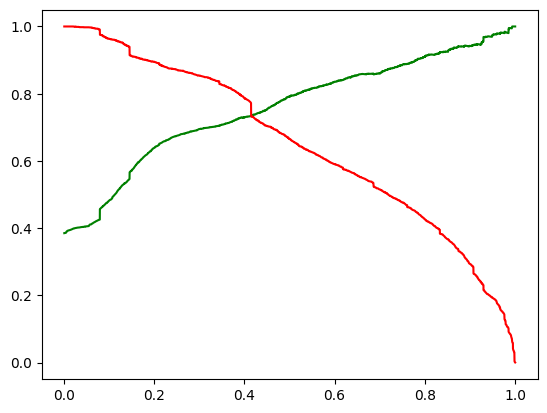

In [254]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [255]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.206434,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.183975,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.080180,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.864828,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.532143,1,1,1,1,1,1,1,0,0,0,0,1


In [257]:
# Let's check the accuracy now

round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted), 2)

0.81

In [258]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3191,  714],
       [ 521, 1925]])

In [259]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [261]:
# Calculate Precision

print(round(TP/(TP+FP), 2)*100)

73.0


In [262]:
# Calculate Recall

print(round(TP/(TP+FN), 2)*100)

79.0


## Predictions on the Test Set

#### 2.1.1. Numerical Variables

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074

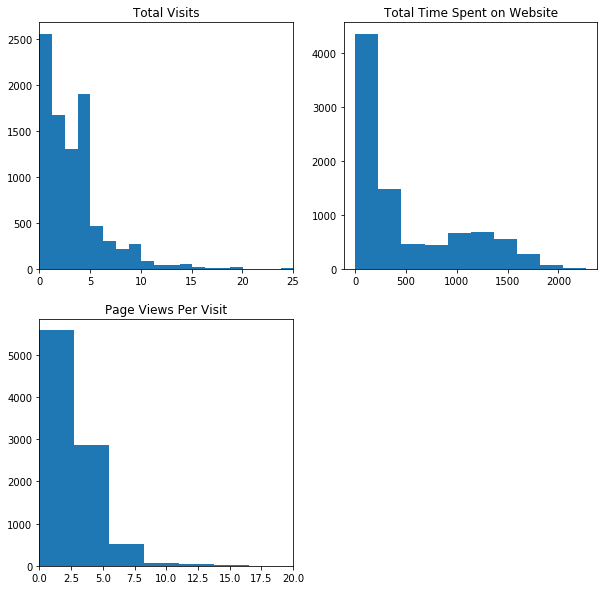

In [31]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

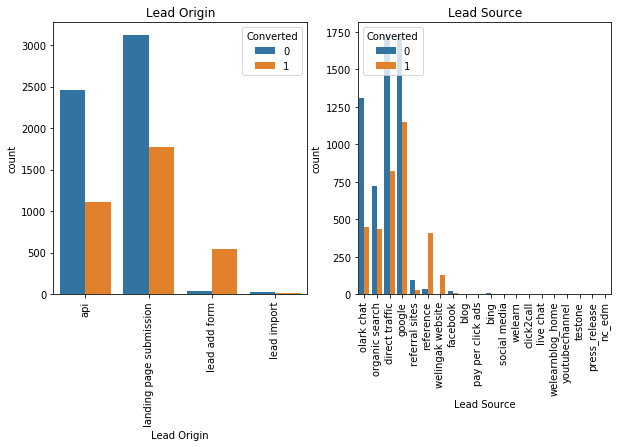

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

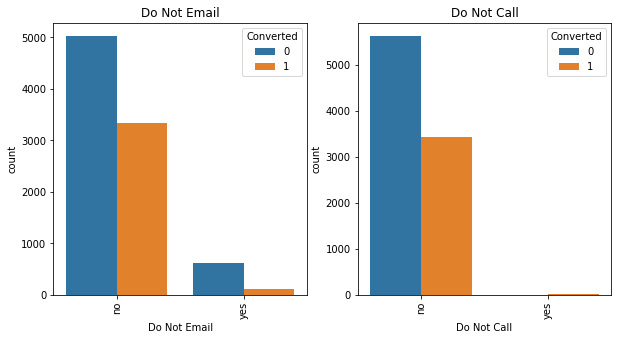

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

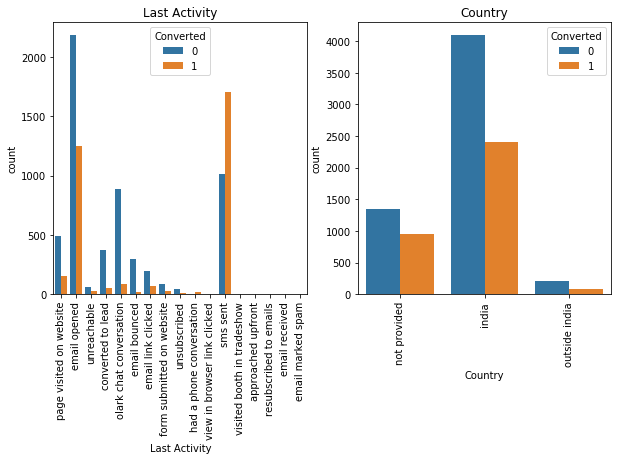

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

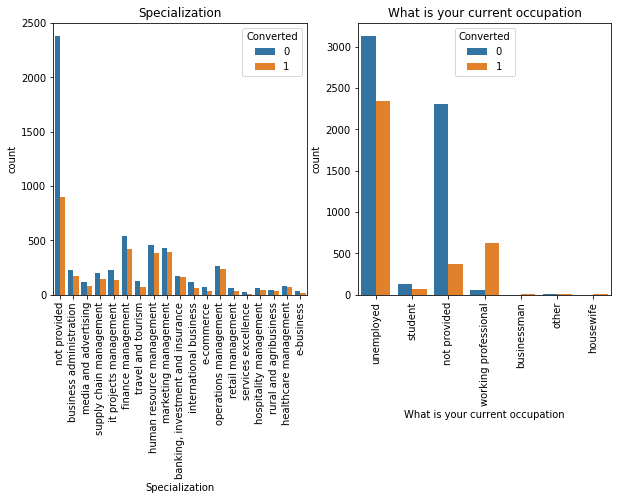

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

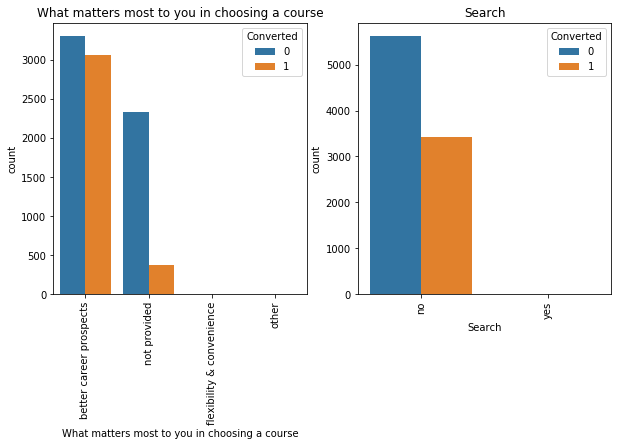

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

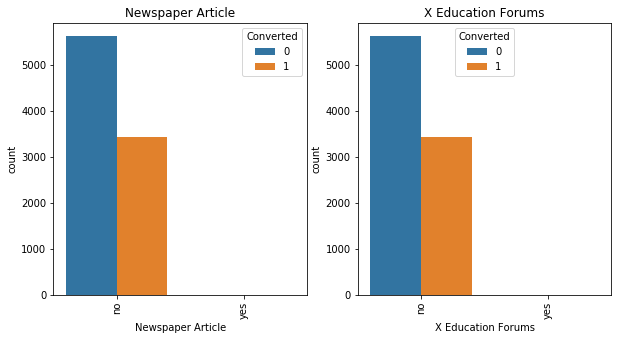

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

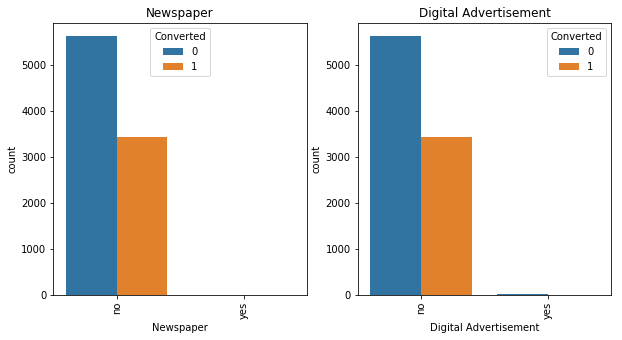

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

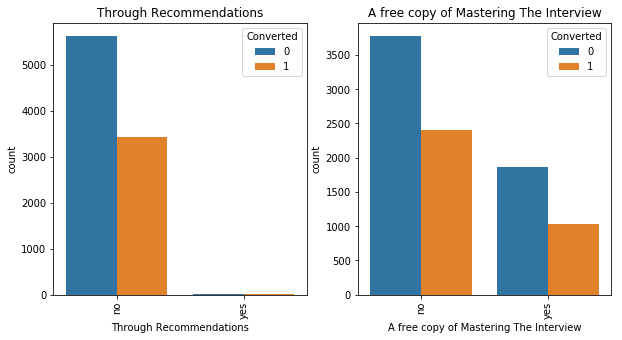

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

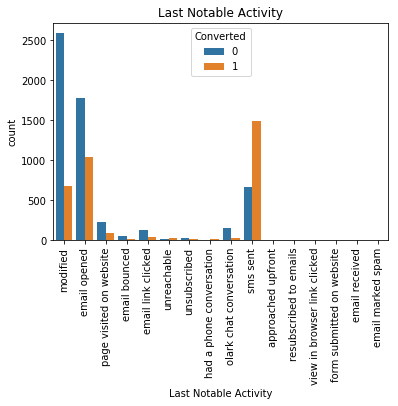

In [40]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

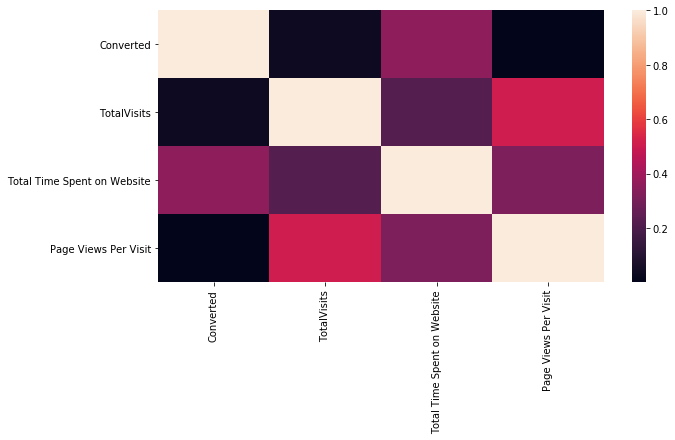

In [127]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr())
plt.show()

<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [42]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## 3. Dummy Variables

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074

In [44]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
5,api,olark chat,no,no,0,0.0,0,0.00,olark chat conversation,not provided,...,0,0,1,0,0,0,0,0,0,0
6,landing page submission,google,no,no,1,2.0,1640,2.00,email opened,india,...,0,0,1,0,0,0,0,0,0,0
7,api,olark chat,no,no,0,0.0,0,0.00,olark chat conversation,not provided,...,0,0,1,0,0,0,0,0,0,0
8,landing page submission,direct traffic,no,no,0,2.0,71,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
9,api,google,no,no,0,4.0,58,4.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,2.0,71,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,4.0,58,4.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Test-Train Split

In [47]:
# Import the required library
from sklearn.model_selection import train_test_split

In [48]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [51]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [53]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
# Import RFE
from sklearn.feature_selection import RFE

In [55]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 46),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 43),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 40),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [57]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [58]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [59]:
# Importing statsmodels
import statsmodels.api as sm

In [60]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 10 Jun 2019   Deviance:                       5482.6
Time:                        17:10:21   Pearson chi2:                 6.64e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2524      0.081    -15.450      0.000      -1.411      -1.094
TotalVisits                                              4.5519      1.398      3.256      0.001       1.812       7.292
Total Time Spent on Website                              4.5660      0.162     28.101      0.000       4.248       4.884
Lead Origin_lead add form                                2.6773      0.225     11.916      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.979      0.000      -1.703      -1.256
Lead Source_google                                      -1.1705      0.109    -10.690      0.000      -1.385      -0.956
Lead Source_organic search                              -1.2823      0.134     -9.541      0.000      -1.546      -1.019
Lead Source_welingak website                             2.5984      1.033      2.515      0.012       0.573       4.624
Do Not Email_yes                                        -1.4076      0.168     -8.387      0.000      -1.737      -1.079
Last Activity_olark chat conversation                   -1.4678      0.165     -8.874      0.000      -1.792      -1.144
Last Activity_sms sent                                   1.3213      0.073     18.222      0.000       1.179       1.463
What is your current occupation_housewife               24.4759   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
What is your current occupation_other                    1.4134      0.760      1.859      0.063      -0.077       2.904
What is your current occupation_working professional     2.8071      0.193     14.509      0.000       2.428       3.186
Last Notable Activity_had a phone conversation          24.2053   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Last Notable Activity_unreachable                        1.7029      0.610      2.790      0.005       0.507       2.899
========================================================================================================================
"""

In [61]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [63]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.9
Date:                Mon, 10 Jun 2019   Deviance:                       5499.7
Time:                        17:10:22   Pearson chi2:                 6.64e+03
No. Iterations:                    20   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2492      0.081    -15.422      0.000      -1.408      -1.090
TotalVisits                                              4.7231      1.410      3.349      0.001       1.959       7.488
Total Time Spent on Website                              4.5511      0.162     28.089      0.000       4.234       4.869
Lead Origin_lead add form                                2.6773      0.225     11.918      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.987      0.000      -1.703      -1.256
Lead Source_google                                      -1.1600      0.109    -10.611      0.000      -1.374      -0.946
Lead Source_organic search                              -1.2778      0.134     -9.510      0.000      -1.541      -1.014
Lead Source_welingak website                             2.5990      1.033      2.515      0.012       0.574       4.624
Do Not Email_yes                                        -1.4113      0.168     -8.413      0.000      -1.740      -1.083
Last Activity_olark chat conversation                   -1.4730      0.165     -8.908      0.000      -1.797      -1.149
Last Activity_sms sent                                   1.3132      0.072     18.136      0.000       1.171       1.455
What is your current occupation_housewife               22.4667   1.13e+04      0.002      0.998   -2.21e+04    2.21e+04
What is your current occupation_other                    1.4049      0.760      1.848      0.065      -0.085       2.895
What is your current occupation_working professional     2.8013      0.193     14.487      0.000       2.422       3.180
Last Notable Activity_unreachable                        1.6925      0.610      2.774      0.006       0.497       2.888
========================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [66]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [67]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.4
Date:                Mon, 10 Jun 2019   Deviance:                       5510.8
Time:                        17:10:22   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2461      0.081    -15.396      0.000      -1.405      -1.087
TotalVisits                                              4.6490      1.403      3.314      0.001       1.899       7.399
Total Time Spent on Website                              4.5480      0.162     28.098      0.000       4.231       4.865
Lead Origin_lead add form                                2.6841      0.224     11.957      0.000       2.244       3.124
Lead Source_direct traffic                              -1.4736      0.114    -12.954      0.000      -1.697      -1.251
Lead Source_google                                      -1.1551      0.109    -10.580      0.000      -1.369      -0.941
Lead Source_organic search                              -1.2633      0.134     -9.426      0.000      -1.526      -1.001
Lead Source_welingak website                             2.5921      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4146      0.168     -8.437      0.000      -1.743      -1.086
Last Activity_olark chat conversation                   -1.4765      0.165     -8.932      0.000      -1.800      -1.152
Last Activity_sms sent                                   1.3072      0.072     18.070      0.000       1.165       1.449
What is your current occupation_other                    1.4003      0.760      1.842      0.066      -0.090       2.890
What is your current occupation_working professional     2.7968      0.193     14.467      0.000       2.418       3.176
Last Notable Activity_unreachable                        1.6871      0.610      2.766      0.006       0.492       2.883
========================================================================================================================
"""

In [68]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___</font>

In [69]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [70]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.3
Date:                Mon, 10 Jun 2019   Deviance:                       5514.5
Time:                        17:10:22   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2466      0.081    -15.398      0.000      -1.405      -1.088
TotalVisits                                              4.7586      1.410      3.375      0.001       1.995       7.522
Total Time Spent on Website                              4.5539      0.162     28.136      0.000       4.237       4.871
Lead Origin_lead add form                                2.6860      0.224     11.966      0.000       2.246       3.126
Lead Source_direct traffic                              -1.4706      0.114    -12.929      0.000      -1.694      -1.248
Lead Source_google                                      -1.1564      0.109    -10.588      0.000      -1.370      -0.942
Lead Source_organic search                              -1.2631      0.134     -9.416      0.000      -1.526      -1.000
Lead Source_welingak website                             2.5923      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4186      0.168     -8.461      0.000      -1.747      -1.090
Last Activity_olark chat conversation                   -1.4717      0.165     -8.909      0.000      -1.796      -1.148
Last Activity_sms sent                                   1.3038      0.072     18.031      0.000       1.162       1.445
What is your current occupation_working professional     2.7934      0.193     14.449      0.000       2.414       3.172
Last Notable Activity_unreachable                        1.6837      0.610      2.761      0.006       0.488       2.879
========================================================================================================================
"""

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.33
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
10,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


<font color= green>___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## 6. Creating Prediction

In [72]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.611739
3604    0.223294
5584    0.425011
7679    0.223294
7563    0.432202
7978    0.732762
7780    0.130274
7863    0.982565
838     0.779231
708     0.132990
dtype: float64

In [73]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61173868, 0.22329356, 0.42501069, 0.22329356, 0.43220183,
       0.73276232, 0.13027447, 0.9825646 , 0.77923117, 0.13298976])

In [74]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.611739
1,0,0.223294
2,0,0.425011
3,0,0.223294
4,0,0.432202


In [75]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.611739,1
1,0,0.223294,0
2,0,0.425011,0
3,0,0.223294,0
4,0,0.432202,0


## 7. Model Evaluation

In [76]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [77]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [78]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [79]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.807746811525744

<font color= green>___That's around 81% accuracy with is a very good value___</font>

In [80]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [81]:
# Calculating the sensitivity
TP/(TP+FN)

0.7031758957654723

In [82]:
# Calculating the specificity
TN/(TN+FP)

0.8736842105263158

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [83]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

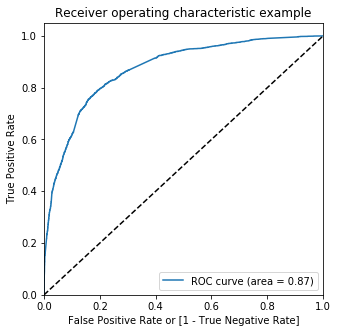

In [85]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.87 which is a very good value.___</font>

In [86]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0


In [87]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.572508,0.972720,0.320154
0.2,0.2,0.717840,0.923453,0.588190
0.3,0.3,0.783341,0.829397,0.754300
0.4,0.4,0.805228,0.765879,0.830039
0.5,0.5,0.807747,0.703176,0.873684
0.6,0.6,0.784758,0.569625,0.920411
0.7,0.7,0.769643,0.495114,0.942747
0.8,0.8,0.749961,0.400651,0.970218
0.9,0.9,0.700205,0.243485,0.988190


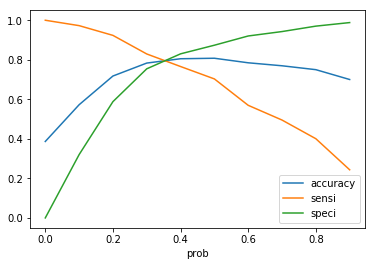

In [88]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [90]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7967249252086286

In [91]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3097,  798],
       [ 493, 1963]], dtype=int64)

In [92]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [93]:
# Calculating the sensitivity
TP/(TP+FN)

0.7992671009771987

In [94]:
# Calculating the specificity
TN/(TN+FP)

0.7951219512195122

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 8. Prediction on Test set

In [95]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [96]:
# Substituting all the columns in the final train model
col = X_train.columns

In [97]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,1,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,0,0,0,1,0,0,0,1,1,0
2085,1.0,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0
4048,1.0,0.028369,0.617077,0,1,0,0,0,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,1,0,0,0,0,0,0,0,0
8552,1.0,0.063830,0.552817,0,1,0,0,0,0,0,1,0,0
2232,1.0,0.021277,0.496919,0,0,0,1,0,1,0,0,0,0
5259,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0
2399,1.0,0.028369,0.639085,0,0,1,0,0,1,0,1,0,0
8018,1.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0


In [98]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [99]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
5,1,0.803423,1
6,0,0.173071,0
7,1,0.223294,0
8,1,0.628924,1
9,0,0.061901,0


In [100]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8005875872199779

In [101]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1394,  350],
       [ 193,  786]], dtype=int64)

In [102]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Calculating the sensitivity
TP/(TP+FN)

0.8028600612870276

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.7993119266055045

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 9. Precision-Recall

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [106]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7782785038305543

In [107]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7031758957654723

<font color= green>___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___</font>

### 9.1. Precision and recall tradeoff

In [108]:
from sklearn.metrics import precision_recall_curve

In [109]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       1
 6       1
 7       1
 8       1
 9       0
 10      1
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      1
 18      1
 19      0
 20      1
 21      1
 22      0
 23      1
 24      0
 25      0
 26      1
 27      0
 28      0
 29      0
        ..
 6321    1
 6322    1
 6323    0
 6324    0
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    1
 6332    0
 6333    0
 6334    1
 6335    0
 6336    0
 6337    1
 6338    0
 6339    0
 6340    1
 6341    0
 6342    0
 6343    0
 6344    1
 6345    1
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      0
 13      0
 14      0
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

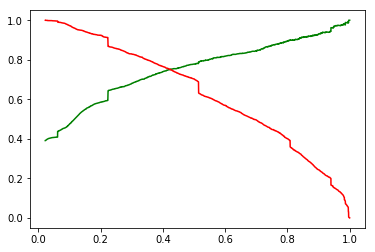

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [113]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8060148008187688

In [114]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3256,  639],
       [ 593, 1863]], dtype=int64)

In [115]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [116]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7446043165467626

In [117]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

<font color= green>___With the current cut off as 0.41 we have Precision around 74% and Recall around 76%___</font>

## 10. Prediction on Test set

In [118]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [119]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
5,1,0.803423,1
6,0,0.173071,0
7,1,0.223294,0
8,1,0.628924,1
9,0,0.061901,0


In [120]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.808666911494675

In [121]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1465,  279],
       [ 242,  737]], dtype=int64)

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7253937007874016

In [124]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7528089887640449

<font color= green>___With the current cut off as 0.41 we have Precision around 73% and Recall around 75%___</font>

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.